In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from tensorflow.python.saved_model import builder as pb_builder

In [3]:
import pandas as pd

In [4]:
from PIL import Image

In [5]:
train_data = pd.read_csv("D:/ML/Dataset/Emotion Detection/train.csv")

In [6]:
test_data = pd.read_csv("D:/ML/Dataset/Emotion Detection/test.csv")

In [7]:
# DATA EXPLORATION

In [8]:
train_data.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [9]:
len(train_data)

28709

In [10]:
len(test_data)

7178

In [11]:
test_data.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [12]:
train_data.shape

(28709, 2)

In [13]:
test_data.shape

(7178, 1)

In [14]:
data = train_data.iloc[0,1]

In [15]:
len(data)

8287

In [16]:
L = data.split()

In [17]:
len(L)

2304

In [18]:
L

['70',
 '80',
 '82',
 '72',
 '58',
 '58',
 '60',
 '63',
 '54',
 '58',
 '60',
 '48',
 '89',
 '115',
 '121',
 '119',
 '115',
 '110',
 '98',
 '91',
 '84',
 '84',
 '90',
 '99',
 '110',
 '126',
 '143',
 '153',
 '158',
 '171',
 '169',
 '172',
 '169',
 '165',
 '129',
 '110',
 '113',
 '107',
 '95',
 '79',
 '66',
 '62',
 '56',
 '57',
 '61',
 '52',
 '43',
 '41',
 '65',
 '61',
 '58',
 '57',
 '56',
 '69',
 '75',
 '70',
 '65',
 '56',
 '54',
 '105',
 '146',
 '154',
 '151',
 '151',
 '155',
 '155',
 '150',
 '147',
 '147',
 '148',
 '152',
 '158',
 '164',
 '172',
 '177',
 '182',
 '186',
 '189',
 '188',
 '190',
 '188',
 '180',
 '167',
 '116',
 '95',
 '103',
 '97',
 '77',
 '72',
 '62',
 '55',
 '58',
 '54',
 '56',
 '52',
 '44',
 '50',
 '43',
 '54',
 '64',
 '63',
 '71',
 '68',
 '64',
 '52',
 '66',
 '119',
 '156',
 '161',
 '164',
 '163',
 '164',
 '167',
 '168',
 '170',
 '174',
 '175',
 '176',
 '178',
 '179',
 '183',
 '187',
 '190',
 '195',
 '197',
 '198',
 '197',
 '198',
 '195',
 '191',
 '190',
 '145',
 '86'

In [19]:
48*48

2304

In [20]:
final_img = [[0] * 48 for i in range(48)]

In [21]:
starting_point = 0
for i in range(0,48):
    for j in range(0,48):
        final_img[i][j] = L[starting_point]
        starting_point += 1
        

In [22]:
final_img

[['70',
  '80',
  '82',
  '72',
  '58',
  '58',
  '60',
  '63',
  '54',
  '58',
  '60',
  '48',
  '89',
  '115',
  '121',
  '119',
  '115',
  '110',
  '98',
  '91',
  '84',
  '84',
  '90',
  '99',
  '110',
  '126',
  '143',
  '153',
  '158',
  '171',
  '169',
  '172',
  '169',
  '165',
  '129',
  '110',
  '113',
  '107',
  '95',
  '79',
  '66',
  '62',
  '56',
  '57',
  '61',
  '52',
  '43',
  '41'],
 ['65',
  '61',
  '58',
  '57',
  '56',
  '69',
  '75',
  '70',
  '65',
  '56',
  '54',
  '105',
  '146',
  '154',
  '151',
  '151',
  '155',
  '155',
  '150',
  '147',
  '147',
  '148',
  '152',
  '158',
  '164',
  '172',
  '177',
  '182',
  '186',
  '189',
  '188',
  '190',
  '188',
  '180',
  '167',
  '116',
  '95',
  '103',
  '97',
  '77',
  '72',
  '62',
  '55',
  '58',
  '54',
  '56',
  '52',
  '44'],
 ['50',
  '43',
  '54',
  '64',
  '63',
  '71',
  '68',
  '64',
  '52',
  '66',
  '119',
  '156',
  '161',
  '164',
  '163',
  '164',
  '167',
  '168',
  '170',
  '174',
  '175',
  '176

In [23]:
array = np.array(final_img, dtype=np.uint8)

In [24]:
array

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]], dtype=uint8)

In [25]:
new_image = Image.fromarray(array)

In [26]:
new_image.save('brandNew.png')

In [27]:
# DATA PREPROCESSING - TRAINING DATA IS CREATED

In [28]:
CATEGORIES = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]

In [29]:
# CORRESPODING INDEX NUMBER OF THE CATEGORIES DEPICT THEIR LABELS

In [30]:
training_data = []

In [31]:
def create_training_data():
    for i in range(len(train_data)):
        initial_list = train_data.iloc[i,1].split()
        final_img = [[0] * 48 for i in range(48)]
        label = train_data.iloc[i,0]
        starting_point = 0
        for i in range(0,48):
            for j in range(0,48):
                final_img[i][j] = initial_list[starting_point]
                starting_point += 1
        array = np.array(final_img, dtype=np.uint8)
        initial_image = cv2.resize(array,(48,48))
#         upgrade_image = cv2.cvtColor(initial_image,cv2.COLOR_GRAY2RGB)
        training_data.append([initial_image,label])
    
    

In [32]:
create_training_data()

In [33]:
len(training_data)

28709

In [34]:
training_data

[[array([[ 70,  80,  82, ...,  52,  43,  41],
         [ 65,  61,  58, ...,  56,  52,  44],
         [ 50,  43,  54, ...,  49,  56,  47],
         ...,
         [ 91,  65,  42, ...,  72,  56,  43],
         [ 77,  82,  79, ..., 105,  70,  46],
         [ 77,  72,  84, ..., 106, 109,  82]], dtype=uint8),
  0],
 [array([[151, 150, 147, ..., 129, 140, 120],
         [151, 149, 149, ..., 122, 141, 137],
         [151, 151, 156, ..., 109, 123, 146],
         ...,
         [188, 188, 121, ..., 185, 185, 186],
         [188, 187, 196, ..., 186, 182, 187],
         [186, 184, 185, ..., 193, 183, 184]], dtype=uint8),
  0],
 [array([[231, 212, 156, ...,  44,  27,  16],
         [229, 175, 148, ...,  27,  35,  27],
         [214, 156, 157, ...,  28,  22,  28],
         ...,
         [241, 245, 250, ...,  57, 101, 146],
         [246, 250, 252, ...,  78, 105, 162],
         [250, 251, 250, ...,  88, 110, 152]], dtype=uint8),
  2],
 [array([[ 24,  32,  36, ..., 173, 172, 173],
         [ 25,  34,  

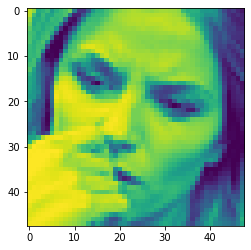

In [35]:
plt.imshow(training_data[2][0])

In [36]:
training_data[2][0].shape

(48, 48)

In [37]:
initial_image = cv2.resize(array,(120,120))

In [38]:
upgrade_img = cv2.cvtColor(initial_image,cv2.COLOR_GRAY2RGB)

In [39]:
upgrade_img.shape

(120, 120, 3)

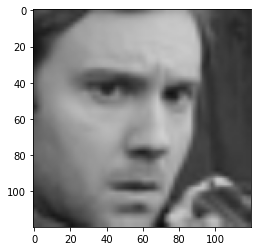

In [40]:
plt.imshow(upgrade_img)

In [41]:
training_data[2][1]

2

In [42]:
# CREATING THE VALIDATION DATA

In [43]:
validation_data = []

In [44]:
def create_validation_data():
    for i in range(len(train_data)-20000):
        initial_list = train_data.iloc[i,1].split()
        final_img = [[0] * 48 for i in range(48)]
        label = train_data.iloc[i,0]
        starting_point = 0
        for i in range(0,48):
            for j in range(0,48):
                final_img[i][j] = initial_list[starting_point]
                starting_point += 1
        array = np.array(final_img, dtype=np.uint8)
        initial_image = cv2.resize(array,(48,48))
#         upgrade_image = cv2.cvtColor(initial_image,cv2.COLOR_GRAY2RGB)
        validation_data.append([initial_image,label])

In [45]:
create_validation_data()

In [46]:
len(validation_data)

8709

In [47]:
# CREATING THE TESTING DATA

In [48]:
testing_data  = []

In [49]:
def create_testing_data():
    for i in range(0,len(test_data)):
        initial_list = test_data.iloc[i,0].split()
        final_img = [[0] * 48 for i in range(48)]
        label = 0
        starting_point = 0
        for i in range(0,48):
            for j in range(0,48):
                final_img[i][j] = initial_list[starting_point]
                starting_point += 1
        array = np.array(final_img, dtype=np.uint8)
        initial_image = cv2.resize(array,(48,48))
#         upgrade_image = cv2.cvtColor(initial_image,cv2.COLOR_GRAY2RGB)
        testing_data.append([initial_image,label])

In [50]:
create_testing_data()

In [51]:
len(testing_data)

7178

In [52]:
training_data

[[array([[ 70,  80,  82, ...,  52,  43,  41],
         [ 65,  61,  58, ...,  56,  52,  44],
         [ 50,  43,  54, ...,  49,  56,  47],
         ...,
         [ 91,  65,  42, ...,  72,  56,  43],
         [ 77,  82,  79, ..., 105,  70,  46],
         [ 77,  72,  84, ..., 106, 109,  82]], dtype=uint8),
  0],
 [array([[151, 150, 147, ..., 129, 140, 120],
         [151, 149, 149, ..., 122, 141, 137],
         [151, 151, 156, ..., 109, 123, 146],
         ...,
         [188, 188, 121, ..., 185, 185, 186],
         [188, 187, 196, ..., 186, 182, 187],
         [186, 184, 185, ..., 193, 183, 184]], dtype=uint8),
  0],
 [array([[231, 212, 156, ...,  44,  27,  16],
         [229, 175, 148, ...,  27,  35,  27],
         [214, 156, 157, ...,  28,  22,  28],
         ...,
         [241, 245, 250, ...,  57, 101, 146],
         [246, 250, 252, ...,  78, 105, 162],
         [250, 251, 250, ...,  88, 110, 152]], dtype=uint8),
  2],
 [array([[ 24,  32,  36, ..., 173, 172, 173],
         [ 25,  34,  

In [53]:
testing_data

[[array([[254, 254, 254, ...,  16,   0, 161],
         [254, 254, 254, ...,  17,   0, 122],
         [254, 254, 254, ...,  26,   0, 114],
         ...,
         [ 66,  86,  99, ..., 255, 252, 254],
         [ 84,  92,  92, ..., 236, 255, 255],
         [ 93,  90,  85, ...,  42, 129, 180]], dtype=uint8),
  0],
 [array([[156, 184, 198, ..., 157, 154, 150],
         [146, 182, 199, ..., 161, 154, 150],
         [135, 176, 195, ..., 165, 161, 155],
         ...,
         [ 28,  25,  21, ..., 179, 175, 173],
         [ 29,  18,  22, ..., 177, 172, 169],
         [ 21,  14,  23, ..., 172, 167, 161]], dtype=uint8),
  0],
 [array([[ 69, 118,  61, ..., 118, 124, 144],
         [ 66, 115,  57, ..., 129, 123, 131],
         [ 64, 116,  61, ..., 136, 140, 136],
         ...,
         [114,  87, 136, ...,  98,  84,  86],
         [114,  85, 140, ...,  89,  84,  88],
         [114,  87, 145, ...,  88,  87,  90]], dtype=uint8),
  0],
 [array([[205, 203, 236, ..., 127, 158, 144],
         [186, 213, 1

In [54]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [55]:
from tensorflow.keras.optimizers import RMSprop

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
train_datagen = ImageDataGenerator(rescale=1.0/255.,)

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.

 
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.

In [58]:
import random
random.shuffle(training_data)

In [59]:
X_train = []
y_train = []
X_test = []
y_test = []
X_valid = []
y_valid = []

In [60]:
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
X_train = np.array(X_train).reshape(-1,48,48,1)
y_train = np.array(y_train)

In [61]:
for features,label in validation_data:
    X_valid.append(features)
    y_valid.append(label)
X_valid = np.array(X_valid).reshape(-1,48,48,1)
y_valid = np.array(y_valid)

In [62]:
for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1,48,48,1)
y_test = np.array(y_test)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,BatchNormalization

In [64]:
X_train

array([[[[ 41],
         [ 25],
         [ 22],
         ...,
         [ 37],
         [ 40],
         [ 41]],

        [[ 30],
         [ 28],
         [ 26],
         ...,
         [ 40],
         [ 33],
         [ 33]],

        [[ 33],
         [ 36],
         [ 39],
         ...,
         [ 51],
         [ 42],
         [ 36]],

        ...,

        [[203],
         [202],
         [203],
         ...,
         [206],
         [204],
         [208]],

        [[204],
         [203],
         [201],
         ...,
         [206],
         [205],
         [208]],

        [[203],
         [203],
         [201],
         ...,
         [142],
         [207],
         [205]]],


       [[[213],
         [215],
         [206],
         ...,
         [ 95],
         [ 95],
         [101]],

        [[204],
         [213],
         [218],
         ...,
         [ 95],
         [ 96],
         [100]],

        [[208],
         [211],
         [225],
         ...,
         [ 97],
         [

In [65]:
X_train.shape[1:]

(48, 48, 1)

In [66]:
X_train = X_train/255.0

In [67]:
# vgg19 = keras.applications.VGG19(weights='imagenet', include_top=False)

In [68]:
path_inception = "D:/ML/Dataset/Emotion Detection/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = path_inception
pre_trained_model = InceptionV3(input_shape = (75, 75, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable=False
  # Your Code Here

  
# Print the model summary
pre_trained_model.summary()

# Expected Output is extremely large, but should end with:

# batch_normalization_v1_281 (Bat (None, 3, 3, 192)    576         conv2d_281[0][0]                 
# __________________________________________________________________________________________________
# activation_273 (Activation)     (None, 3, 3, 320)    0           batch_normalization_v1_273[0][0] 
# __________________________________________________________________________________________________
# mixed9_1 (Concatenate)          (None, 3, 3, 768)    0           activation_275[0][0]             
#                                                                 activation_276[0][0]             
# __________________________________________________________________________________________________
# concatenate_5 (Concatenate)     (None, 3, 3, 768)    0           activation_279[0][0]             
#                                                                 activation_280[0][0]             
# __________________________________________________________________________________________________
# activation_281 (Activation)     (None, 3, 3, 192)    0           batch_normalization_v1_281[0][0] 
# __________________________________________________________________________________________________
# mixed10 (Concatenate)           (None, 3, 3, 2048)   0           activation_273[0][0]             
#                                                                 mixed9_1[0][0]                   
#                                                                 concatenate_5[0][0]              
#                                                                 activation_281[0][0]             
# ==================================================================================================
# Total params: 21,802,784
# Trainable params: 0
# Non-trainable params: 21,802,784

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [69]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Expected Output:
# ('last layer output shape: ', (None, 7, 7, 768))

last layer output shape:  (None, 3, 3, 768)


In [70]:
import seaborn as sns

In [71]:
import matplotlib.pyplot as plt

In [72]:
from tensorflow.keras.layers import Bidirectional,LSTM, Dense, Embedding, Dropout, GlobalAveragePooling1D

In [73]:
%matplotlib inline

In [74]:
model = Sequential()
# model.add(Conv2D(128, (3, 3), input_shape=X_train.shape[1:]))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(512, (3, 3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(512, (3, 3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(tf.keras.layers.Flatten(input_shape = (48,48)))

model.add(tf.keras.Input(shape=(48,48)))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# model.add(Dense(256))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# model.add(Dense(256))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dense(128))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dense(64))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dense(48))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

model.add(Dense(7))
model.add(Activation('softmax'))




In [75]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [76]:
# # Flatten the output layer to 1 dimension
# input_layer = tf.keras.Input(shape=(48, 48))
# x = layers.Flatten()(input_layer)
# # Add a fully connected layer with 1,024 hidden units and ReLU activation
# x = layers.Dense(512,activation='relu')(x)
# # Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(512,activation='relu')(x)
# # Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(512,activation='relu')(x)
# # Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(256,activation='relu')(x)
# # Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(128,activation='relu')(x)
# # Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)
# # Add a final sigmoid layer for classification
# output_layer = layers.Dense(7,activation='softmax')(x)

# model = Model(inputs=input_layer, outputs=output_layer)

In [77]:
# model = Model(pre_trained_model.input, x) 

In [78]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
input_2 (InputLayer)         multiple                  0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2360320   
_________________________________________________________________
batch_normalization_94 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_94 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5

In [80]:
model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
898/898 [==============================] - 12s 14ms/step - loss: 1.7967 - accuracy: 0.3006 - val_loss: 1903.2517 - val_accuracy: 0.0000e+00
Epoch 2/30
898/898 [==============================] - 12s 14ms/step - loss: 1.6385 - accuracy: 0.3594 - val_loss: 94.5469 - val_accuracy: 0.5025
Epoch 3/30
898/898 [==============================] - 11s 13ms/step - loss: 1.5723 - accuracy: 0.3857 - val_loss: 637.8007 - val_accuracy: 0.0000e+00
Epoch 4/30
898/898 [==============================] - 11s 12ms/step - loss: 1.5356 - accuracy: 0.4012 - val_loss: 571.1493 - val_accuracy: 0.0032
Epoch 5/30
898/898 [==============================] - 11s 13ms/step - loss: 1.4982 - accuracy: 0.4196 - val_loss: 329.9276 - val_accuracy: 0.0444
Epoch 6/30
898/898 [==============================] - 12s 13ms/step - loss: 1.4627 - accuracy: 0.4358 - val_loss: 376.9439 - val_accuracy: 0.0072
Epoch 7/30
898/898 [==============================] - 12s 13ms/step - loss: 1.4251 - accuracy: 0.4502 - val_loss: 37

In [81]:
model.save('saved_model/my_model')
model.save('my_model.h5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [82]:
import os
import zipfile
import shutil

In [83]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') is not None and logs.get('accuracy')>0.97):
            print("\nReached 97.0% accuracy so cancelling training!")
            self.model.stop_training = True


In [84]:
callbacks = myCallback()

In [85]:
# callbacks=[callbacks]

In [85]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()


# plt.show()

In [86]:
# MAKING PREDICTIONS : BEFORE TESTING PURPOSE

In [87]:
import cv2

In [88]:
happy_pred = cv2.imread("C:/Users/amans/Downloads/happy1.jpg")

In [89]:
type(happy_pred)

NoneType

In [90]:
# happy_pred.shape

In [91]:
# plt.imshow(happy_pred)

In [92]:
# new_img = cv2.cvtColor(happy_pred,cv2.COLOR_BGR2GRAY)

In [94]:
# Import Module
from tkinter import *
from PIL import Image, ImageTk

In [96]:
image = Image.open("C:/Users/amans/Downloads/happy1.jpg")

In [97]:
width = 48
height = 48

In [98]:
resized_image = image.resize((width, height))

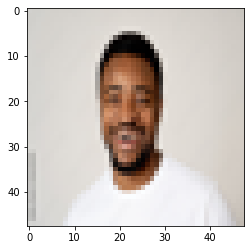

In [99]:
plt.imshow(resized_image)

In [100]:
resized_image.save('happyPred.jpeg')

In [101]:
happy_prediction = cv2.imread("happyPred.jpeg",cv2.IMREAD_GRAYSCALE)

In [102]:
happy_prediction.shape

(48, 48)

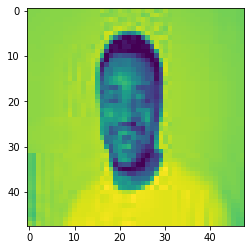

In [103]:
plt.imshow(happy_prediction)

In [104]:
happy_prediction = happy_prediction.reshape((1,48,48))

In [105]:
happy_prediction.shape

(1, 48, 48)

In [106]:
model.predict(happy_prediction)

array([[0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [107]:
validation_data

[[array([[ 70,  80,  82, ...,  52,  43,  41],
         [ 65,  61,  58, ...,  56,  52,  44],
         [ 50,  43,  54, ...,  49,  56,  47],
         ...,
         [ 91,  65,  42, ...,  72,  56,  43],
         [ 77,  82,  79, ..., 105,  70,  46],
         [ 77,  72,  84, ..., 106, 109,  82]], dtype=uint8),
  0],
 [array([[151, 150, 147, ..., 129, 140, 120],
         [151, 149, 149, ..., 122, 141, 137],
         [151, 151, 156, ..., 109, 123, 146],
         ...,
         [188, 188, 121, ..., 185, 185, 186],
         [188, 187, 196, ..., 186, 182, 187],
         [186, 184, 185, ..., 193, 183, 184]], dtype=uint8),
  0],
 [array([[231, 212, 156, ...,  44,  27,  16],
         [229, 175, 148, ...,  27,  35,  27],
         [214, 156, 157, ...,  28,  22,  28],
         ...,
         [241, 245, 250, ...,  57, 101, 146],
         [246, 250, 252, ...,  78, 105, 162],
         [250, 251, 250, ...,  88, 110, 152]], dtype=uint8),
  2],
 [array([[ 24,  32,  36, ..., 173, 172, 173],
         [ 25,  34,  

In [108]:
check_data = 0

In [109]:
# for features,label in validation_data:
#     check_data += 1
#     features = features.reshape(1,48,48)
#     prediction = model.predict(features)
#     print(np.argmax(prediction))
#     print (label)
#     print(prediction)
    
#     max_pred = prediction[0].index(max(prediction[0]))
#     print(max_pred)
#     break

In [110]:
total_pred = 0
correct_pred = 0

In [111]:
# for features,label in validation_data:
#     total_pred += 1
#     features = features.reshape(1,48,48)
#     prediction = model.predict(features)
#     final_pred = np.argmax(prediction)
#     if (final_pred == label):
#         correct_pred += 1

In [112]:
train_accuracy = correct_pred/total_pred

In [113]:
train_accuracy

0.3504420714203697

In [114]:
valid_data = pd.read_csv("D:/ML/Dataset/Emotion Detection/icml_face_data.csv")

In [115]:
valid_data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [116]:
valid_data.shape

(35887, 3)

In [117]:
len(valid_data)

35887

In [118]:
# PUBLIC TEST STARTS FROM INDEX NUMBER 28709

In [119]:
valid_data.iloc[28709,1]

'PublicTest'

In [120]:
test_case = []

In [121]:
# def create_test_data():
#     for i in range(28709,len(valid_data)):
#         initial_list = valid_data.iloc[i,2].split()
#         final_img = [[0] * 48 for i in range(48)]
#         label = valid_data.iloc[i,0]
#         starting_point = 0
#         for i in range(0,48):
#             for j in range(0,48):
#                 final_img[i][j] = initial_list[starting_point]
#                 starting_point += 1
#         array = np.array(final_img, dtype=np.uint8)
#         test_case.append([array,label])

In [122]:
# create_test_data()

In [123]:
total_pred1 = 0
correct_pred1 = 0

In [124]:
# for features,label in test_case:
#     total_pred1 += 1
#     features = features.reshape(1,48,48)
#     prediction = model.predict(features)
#     final_pred = np.argmax(prediction)
#     if (final_pred == label):
#         correct_pred1 += 1

In [125]:
# validation_accuracy = correct_pred1/total_pred1

In [126]:
# validation_accuracy

0.27723599888548345

In [127]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [1]:
CATEGORIES = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]
COMMAND1 = "CALM DOWN"
COMMAND2 = "DONT BE DISGUSTED"
COMMAND3 = "THERE IS NOTHING TO BE AFRAID OF"
COMMAND4 = "ALWAYS REMAIN HAPPY AND ENJOY YOUR DAY"
COMMAND5 = "CHEER UP, DONT BE SAD"
COMMAND6 = "WHY ARE U SO SURPRISED"
COMMAND7 = "THAT'S THE PERFECT EXPRESSION"
L = ["CALM DOWN","DONT BE DISGUSTED","THERE IS NOTHING TO BE AFRAID OF","ALWAYS REMAIN HAPPY AND ENJOY YOUR DAY","CHEER UP, DONT BE SAD","WHY ARE U SO SURPRISED","THAT'S THE PERFECT EXPRESSION"]

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from gtts import gTTS

In [3]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [4]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),thickness=5)
        return face_img

In [5]:
cap = cv2.VideoCapture(0)

In [7]:
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frames = video_capture.read()
    gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frames, (x, y), (x+w, y+h), (0, 255, 0), 2)
    # Display the resulting frame
    cv2.imshow('Video', frames)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break